In [1]:
import pandas as pd
import re
import json
import numpy as np
import matplotlib.pyplot as plt
from mplsoccer import Pitch
import matplotlib.image as mpimg
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import matplotlib

In [2]:
# List of your file paths
file_paths = [
    r"C:\Users\backo\Downloads\Cottbus vs Rot-Weiss Essen.xlsx",
    r"C:\Users\backo\Downloads\Dortmund vs cottbus.xlsx",
    r"C:\Users\backo\Downloads\1860 munich vs cottbus.xlsx",
    r"C:\Users\backo\Downloads\Sandhausen vs cottbus.xlsx",
    r"C:\Users\backo\Downloads\Cottbus vs Aue.xlsx",
    r"C:\Users\backo\Downloads\Cottbus vs Viktoria koeln.xlsx",
    r"C:\Users\backo\Downloads\Unterhaching vs cottbus.xlsx",
    r"C:\Users\backo\Downloads\Cottbus vs Waldhof.xlsx",
    r"C:\Users\backo\Downloads\Rostock vs cottbus.xlsx",
    r"C:\Users\backo\Downloads\Cottbus vs Ingolstadt.xlsx"
]

all_shots_data = []

def extract_shots_data(file_path):
    try:
        df_raw = pd.read_excel(file_path, sheet_name='Shots')
        raw_text = "\n".join(df_raw.iloc[:, 0].astype(str))
        json_arrays = re.findall(r'\[[\s\S]*?\]', raw_text)
        current_file_shots = []
        filename = file_path.split('\\')[-1].replace(".xlsx", "")
        home_team = None
        away_team = None

        cottbus_match = re.search(r"(?i)cottbus", filename)

        if "Energie Cottbus" in filename and filename.index("Energie Cottbus") < filename.find("vs"):
            home_team = "Energie Cottbus"
            opponent_name = filename.split(" vs ")[1]
        elif "Energie Cottbus" in filename:
            away_team = "Energie Cottbus"
            opponent_name = filename.split(" vs ")[0]
        elif cottbus_match and cottbus_match.start() < filename.find("vs"):
            home_team = "Energie Cottbus"
            opponent_name = filename.split(" vs ")[1]
        elif cottbus_match:
            away_team = "Energie Cottbus"
            opponent_name = filename.split(" vs ")[0]
        else:
            home_team = None
            away_team = None
            opponent_name = "Unknown Opponent"

        for array_text in json_arrays:
            fixed_array = re.sub(r'(\s*)(\w+):', r'\1"\2":', array_text)
            try:
                parsed_array = json.loads(fixed_array)
                for shot in parsed_array:
                    team_indicator = 'Home' if shot['isHome'] else 'Away'
                    shooting_team = ""
                    opponent_team = ""

                    if home_team == "Energie Cottbus":
                        shooting_team = home_team if team_indicator == 'Home' else opponent_name.split(".")[0]
                        opponent_team = opponent_name.split(".")[0] if team_indicator == 'Home' else home_team
                    elif away_team == "Energie Cottbus":
                        shooting_team = away_team if team_indicator == 'Away' else opponent_name.split(".")[0]
                        opponent_team = opponent_name.split(".")[0] if team_indicator == 'Away' else away_team
                    else:
                        shooting_team = team_indicator
                        opponent_team = "Unknown Opponent"

                    current_file_shots.append({
                        'match': filename,
                        'shooting_team': shooting_team,
                        'opponent_team': opponent_team,
                        'player_name': shot['player']['name'],
                        'xg': shot.get('xg'),
                        'xgot': shot.get('xgot'),
                        'result': shot.get('shotType'),
                        'start_x': shot['playerCoordinates']['x'] if shot['isHome'] else 100 - shot['playerCoordinates']['x'],
                        'start_y': shot['playerCoordinates']['y'],
                        'end_x': shot['goalMouthCoordinates']['x'] if shot['isHome'] else 100 - shot['goalMouthCoordinates']['x'],
                        'end_y': shot['goalMouthCoordinates']['y'],
                        'minute': shot.get('time')
                    })
            except json.JSONDecodeError as e:
                print(f"Skipping one block in {filename} due to error: {e}")
        return current_file_shots
    except Exception as e:
        print(f"Error processing {file_path}: {e}")
        return []

# Re-run the processing with the modified function
all_shots_data = []
for file_path in file_paths:
    shots_data = extract_shots_data(file_path)
    all_shots_data.extend(shots_data)

all_shots_df = pd.DataFrame(all_shots_data)

print("Combined Shots Data (with corrected team identification):")
print(all_shots_df.head())

Error processing C:\Users\backo\Downloads\Rostock vs cottbus.xlsx: [Errno 2] No such file or directory: 'C:\\Users\\backo\\Downloads\\Rostock vs cottbus.xlsx'
Combined Shots Data (with corrected team identification):
                        match    shooting_team    opponent_team  \
0  Cottbus vs Rot-Weiss Essen  Energie Cottbus  Rot-Weiss Essen   
1  Cottbus vs Rot-Weiss Essen  Rot-Weiss Essen  Energie Cottbus   
2  Cottbus vs Rot-Weiss Essen  Energie Cottbus  Rot-Weiss Essen   
3  Cottbus vs Rot-Weiss Essen  Energie Cottbus  Rot-Weiss Essen   
4  Cottbus vs Rot-Weiss Essen  Energie Cottbus  Rot-Weiss Essen   

          player_name        xg    xgot result  start_x  start_y  end_x  \
0  Niko Bretschneider  0.013530     NaN   miss       32       48      0   
1         Ramien Safi  0.078940     NaN   miss       81       37    100   
2        Timmy Thiele  0.096010     NaN   miss       11       49      0   
3        Yannik Möker  0.002985     NaN   miss       32       46      0   
4    

In [6]:
import pandas as pd
import os

# List of your file paths
file_paths = [
    r"C:\Users\backo\Downloads\Cottbus vs Rot-Weiss Essen.xlsx",
    r"C:\Users\backo\Downloads\Dortmund vs cottbus.xlsx",
    r"C:\Users\backo\Downloads\1860 munich vs cottbus.xlsx",
    r"C:\Users\backo\Downloads\Sandhausen vs cottbus.xlsx",
    r"C:\Users\backo\Downloads\Cottbus vs Aue.xlsx",
    r"C:\Users\backo\Downloads\Cottbus vs Viktoria koeln.xlsx",
    r"C:\Users\backo\Downloads\Unterhaching vs cottbus.xlsx",
    r"C:\Users\backo\Downloads\Cottbus vs Waldhof.xlsx",
    r"C:\Users\backo\Downloads\Rostock vs cottbus.xlsx",
    r"C:\Users\backo\Downloads\Cottbus vs Ingolstadt.xlsx"
]

all_shots_sample_data = []

def extract_shots_sample_data(file_path):
    try:
        df = pd.read_excel(file_path, sheet_name='Shots')
        filename = os.path.basename(file_path).replace(".xlsx", "")
        df['match'] = filename
        return df
    except Exception as e:
        print(f"Error processing {file_path} (Shots sheet): {e}")
        return pd.DataFrame()

# Process all files
for file_path in file_paths:
    shots_sample_df = extract_shots_sample_data(file_path)
    if not shots_sample_df.empty:
        all_shots_sample_data.append(shots_sample_df)

if all_shots_sample_data:
    combined_shots_sample_df = pd.concat(all_shots_sample_data, ignore_index=True)
    print("Combined Shots Sample Data:")
    print(combined_shots_sample_df.head())
    print(f"\nShape of combined Shots Sample DataFrame: {combined_shots_sample_df.shape}")
else:
    print("No data extracted from the 'Shots' sheet of any files.")
    combined_shots_sample_df = pd.DataFrame()

# You can now work with the combined_shots_sample_df

Combined Shots Sample Data:
                               {                       match
0                   "shotmap": [  Cottbus vs Rot-Weiss Essen
1                              {  Cottbus vs Rot-Weiss Essen
2                    "player": {  Cottbus vs Rot-Weiss Essen
3  "name": "Niko Bretschneider",  Cottbus vs Rot-Weiss Essen
4               "firstName": "",  Cottbus vs Rot-Weiss Essen

Shape of combined Shots Sample DataFrame: (15085, 2)


In [7]:
# Now you can proceed with the analysis as before
average_shot_locations = all_shots_df.groupby('shooting_team')[['start_x', 'start_y', 'xg']].mean().reset_index()
print("\nAverage Shot Locations (with average xG):")
print(average_shot_locations)


Average Shot Locations (with average xG):
     shooting_team    start_x    start_y        xg
0      1860 munich  14.272727  51.181818  0.214781
1              Aue  87.571429  45.285714  0.120857
2         Dortmund  13.500000  52.687500  0.250388
3  Energie Cottbus  45.000000  47.528000  0.122586
4       Ingolstadt  85.166667  54.083333  0.221627
5  Rot-Weiss Essen  82.000000  47.500000  0.067909
6       Sandhausen  10.944444  44.277778  0.155092
7     Unterhaching  20.428571  52.285714  0.232387
8   Viktoria koeln  83.857143  55.857143  0.032121
9          Waldhof  85.166667  54.083333  0.221627


In [8]:
# Filter for shots by Energie Cottbus and their opponents
energie_cottbus_shots = all_shots_df[all_shots_df['shooting_team'] == 'Energie Cottbus']
opponent_shots = all_shots_df[all_shots_df['shooting_team'] != 'Energie Cottbus']

print("\nSample of Energie Cottbus Shots:")
print(energie_cottbus_shots.head())

print("\nSample of Opponent Shots:")
print(opponent_shots.head())


Sample of Energie Cottbus Shots:
                        match    shooting_team    opponent_team  \
0  Cottbus vs Rot-Weiss Essen  Energie Cottbus  Rot-Weiss Essen   
2  Cottbus vs Rot-Weiss Essen  Energie Cottbus  Rot-Weiss Essen   
3  Cottbus vs Rot-Weiss Essen  Energie Cottbus  Rot-Weiss Essen   
4  Cottbus vs Rot-Weiss Essen  Energie Cottbus  Rot-Weiss Essen   
5  Cottbus vs Rot-Weiss Essen  Energie Cottbus  Rot-Weiss Essen   

          player_name        xg    xgot result  start_x  start_y  end_x  \
0  Niko Bretschneider  0.013530     NaN   miss       32       48      0   
2        Timmy Thiele  0.096010     NaN   miss       11       49      0   
3        Yannik Möker  0.002985     NaN   miss       32       46      0   
4      Tolcay Ciğerci  0.093060  0.3862   save       22       49      0   
5        Timmy Thiele  0.241100     NaN   miss        4       51      0   

   end_y  minute  
0   41.4      86  
2   51.2      70  
3   58.6      57  
4   52.2      57  
5   58.2      51 

In [9]:
# Now you can perform your analysis focusing on these two filtered DataFrames
average_cottbus_shots = energie_cottbus_shots[['start_x', 'start_y', 'xg']].mean().rename({'start_x': 'avg_x', 'start_y': 'avg_y', 'xg': 'avg_xg'})
print("\nAverage Shot Location for Energie Cottbus:")
print(average_cottbus_shots)


Average Shot Location for Energie Cottbus:
avg_x     45.000000
avg_y     47.528000
avg_xg     0.122586
dtype: float64


In [10]:
# Get most frequent shot areas for Energie Cottbus
bins_x = pd.cut(energie_cottbus_shots['start_x'], bins=range(0, 101, 10), labels=False)
bins_y = pd.cut(energie_cottbus_shots['start_y'], bins=range(0, 101, 10), labels=False)
energie_cottbus_shots['x_bin'] = bins_x
energie_cottbus_shots['y_bin'] = bins_y
most_frequent_cottbus_areas = energie_cottbus_shots.groupby(['x_bin', 'y_bin']).size().reset_index(name='shot_count').sort_values(by='shot_count', ascending=False)
print("\nMost Frequent Shot Areas for Energie Cottbus (10x10 grid):")
print(most_frequent_cottbus_areas.head(10))


Most Frequent Shot Areas for Energie Cottbus (10x10 grid):
    x_bin  y_bin  shot_count
26      8      4          11
6       1      3          10
3       0      5           9
2       0      4           6
15      2      6           6
8       1      5           5
29      9      2           5
27      8      5           5
1       0      3           5
9       1      6           5


C:\Users\backo\AppData\Local\Temp\ipykernel_13360\730652232.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  energie_cottbus_shots['x_bin'] = bins_x
C:\Users\backo\AppData\Local\Temp\ipykernel_13360\730652232.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  energie_cottbus_shots['y_bin'] = bins_y


In [11]:

# Assuming all_shots_df is already created

bins_x = pd.cut(all_shots_df['start_x'], bins=range(0, 101, 10), labels=False)
bins_y = pd.cut(all_shots_df['start_y'], bins=range(0, 101, 10), labels=False)
all_shots_df['x_bin'] = bins_x
all_shots_df['y_bin'] = bins_y

most_frequent_shot_areas = all_shots_df.groupby(['shooting_team', 'x_bin', 'y_bin']).size().reset_index(name='shot_count')
most_frequent_shot_areas = most_frequent_shot_areas.sort_values(by=['shooting_team', 'shot_count'], ascending=[True, False])
print("\nAreas with Most Shots (by 10x10 grid):")
print(most_frequent_shot_areas.head(20))


Areas with Most Shots (by 10x10 grid):
   shooting_team  x_bin  y_bin  shot_count
1    1860 munich      0      4           3
5    1860 munich      1      6           2
0    1860 munich      0      3           1
2    1860 munich      0      5           1
3    1860 munich      0      6           1
4    1860 munich      1      3           1
6    1860 munich      2      5           1
7    1860 munich      4      4           1
11           Aue      9      3           2
8            Aue      7      2           1
9            Aue      7      4           1
10           Aue      7      5           1
12           Aue      9      4           1
13           Aue      9      6           1
19      Dortmund      1      5           5
16      Dortmund      0      5           2
18      Dortmund      1      4           2
22      Dortmund      2      6           2
14      Dortmund      0      3           1
15      Dortmund      0      4           1


C:\Users\backo\AppData\Local\Temp\ipykernel_13360\4108198279.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  energie_cottbus_shots['plot_x'] = energie_cottbus_shots['start_x'] + np.random.uniform(-1.5, 1.5, len(energie_cottbus_shots))
C:\Users\backo\AppData\Local\Temp\ipykernel_13360\4108198279.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  energie_cottbus_shots['plot_y'] = 100 - energie_cottbus_shots['start_y'] + np.random.uniform(-1.5, 1.5, len(energie_cottbus_shots))


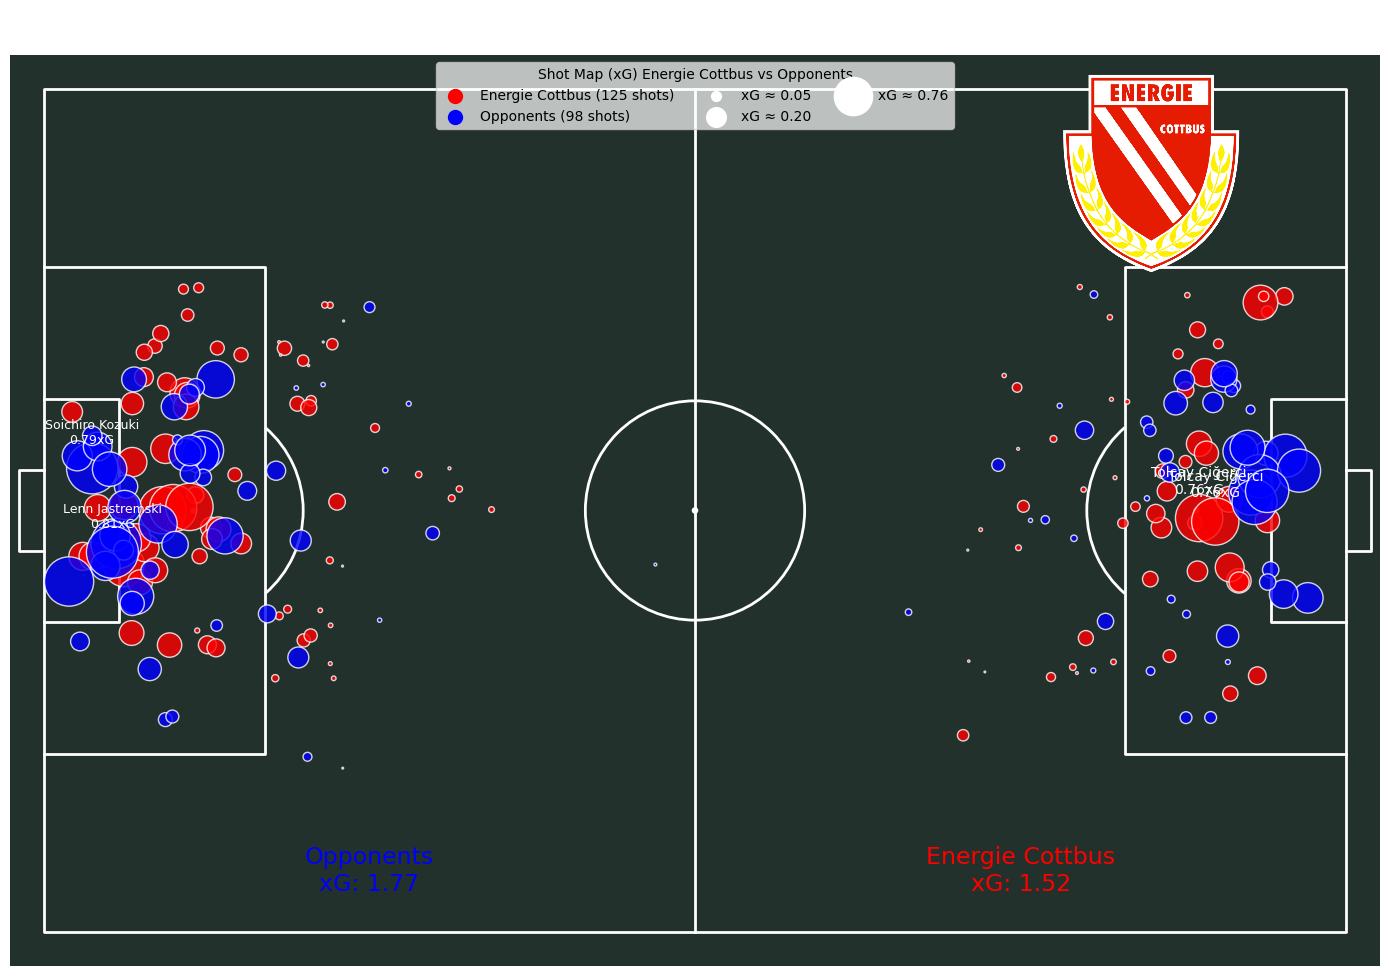

In [18]:
# --- Visualization ---
pitch = Pitch(pitch_type='opta', pitch_color='#22312b',
              line_color='white', goal_type='box')
fig, ax = pitch.draw(figsize=(14, 10))

# --- Energie Cottbus Shots (Right Side - red) ---
energie_cottbus_shots['plot_x'] = energie_cottbus_shots['start_x'] + np.random.uniform(-1.5, 1.5, len(energie_cottbus_shots))
energie_cottbus_shots['plot_y'] = 100 - energie_cottbus_shots['start_y'] + np.random.uniform(-1.5, 1.5, len(energie_cottbus_shots))
pitch.scatter(energie_cottbus_shots['plot_x'], energie_cottbus_shots['plot_y'],
              ax=ax, color='red', edgecolor='white',
              s=energie_cottbus_shots['xg'] * 1530, alpha=0.8, label='Energie Cottbus')

# Highlight Energie Cottbus's top xG shots (adjust number as needed)
for _, row in energie_cottbus_shots.nlargest(2, 'xg').iterrows():
    ax.text(row['plot_x'], row['plot_y'] + 3,
            f"{row['player_name']}\n{row['xg']:.2f}xG",
            color='white', fontsize=10, ha='center')

# --- Opponent Shots (Left Side - yellow) ---
opponent_shots['plot_x'] = opponent_shots['start_x'] + np.random.uniform(-1.5, 1.5, len(opponent_shots))
opponent_shots['plot_y'] = opponent_shots['start_y'] + np.random.uniform(-1.5, 1.5, len(opponent_shots))
pitch.scatter(opponent_shots['plot_x'], opponent_shots['plot_y'],
              ax=ax, color='blue', edgecolor='white',
              s=opponent_shots['xg'] * 1730, alpha=0.8, label='Opponents')

# Highlight opponent's top xG shots (adjust number as needed)
for _, row in opponent_shots.nlargest(2, 'xg').iterrows():
    ax.text(row['plot_x'], row['plot_y'] + 3,
            f"{row['player_name']}\n{row['xg']:.2f}xG",
            color='white', fontsize=9, ha='center')

# --- Legend ---
legend_elements = [
    plt.scatter([], [], color='red', s=100, label=f'Energie Cottbus ({len(energie_cottbus_shots)} shots)'),
    plt.scatter([], [], color='blue', s=100, label=f'Opponents ({len(opponent_shots)} shots)'),
    plt.scatter([], [], color='white', s=50, label='xG ≈ 0.05'),
    plt.scatter([], [], color='white', s=200, label='xG ≈ 0.20'),
    plt.scatter([], [], color='white', s=760, label='xG ≈ 0.76')
]

ax.legend(handles=legend_elements, loc='upper center',
          ncol=3, title='Shot Map (xG) Energie Cottbus vs Opponents', framealpha=0.7)

# --- Statistics --- Xg divided by 5 matches if more
ax.text(75, 5, f"Energie Cottbus\nxG: {energie_cottbus_shots['xg'].sum()/10:.2f}",
        color='red', fontsize=17, ha='center')
ax.text(25, 5, f"Opponents\nxG: {opponent_shots['xg'].sum()/10:.2f}",
        color='blue', fontsize=17, ha='center')

ax.set_title('Complete Shot Map: Energie Cottbus vs Opponents',
              color='white', fontsize=16, pad=20)

# --- Add Team Flags ---
# Load flag images (adjust paths as needed)
cottbus_flag = mpimg.imread(r'C:\Users\backo\Downloads\Logo_Energie_Cottbus.png')
# You'll need a flag image for the opponents - you might need to determine this dynamically
# based on the opponents faced across the four matches. For now, I'll use a placeholder.


# Create OffsetImage objects
cottbus_oi = OffsetImage(cottbus_flag, zoom=0.25)

# Create AnnotationBbox objects to place the images
cottbus_ab = AnnotationBbox(cottbus_oi, (85, 90), xycoords='data', frameon=False)

# Add the AnnotationBbox objects to the axes
ax.add_artist(cottbus_ab)


plt.tight_layout()
plt.show()

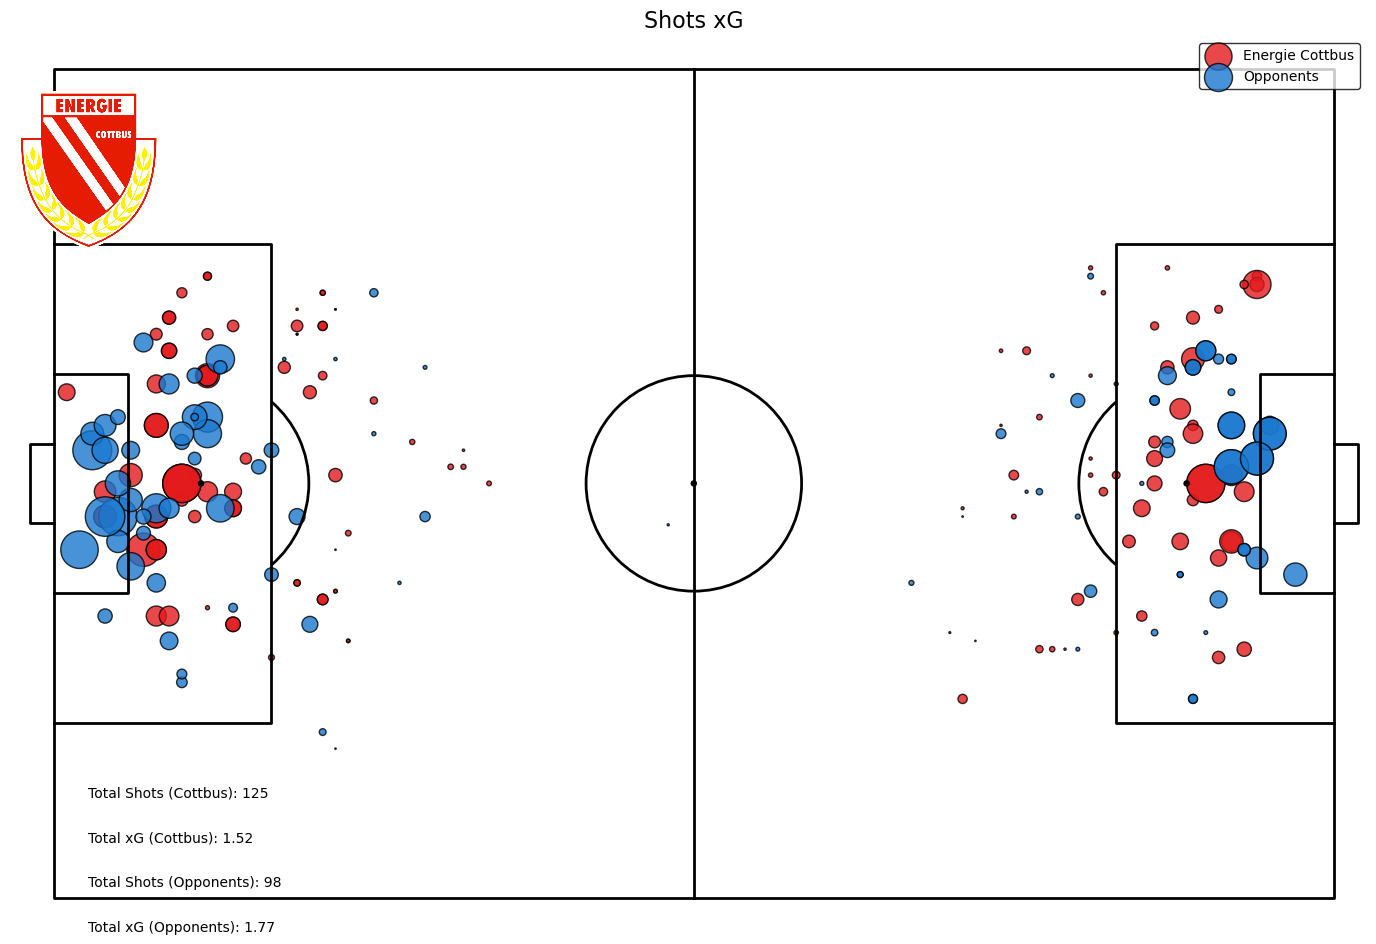

In [19]:
#### Filter for Energie Cottbus shots
cottbus_shots = all_shots_df[all_shots_df['shooting_team'] == 'Energie Cottbus'].copy()
opponent_shots = all_shots_df[all_shots_df['shooting_team'] != 'Energie Cottbus'].copy()

# --- Visualization on Normal Opta Pitch ---
pitch = Pitch(pitch_type='opta', pitch_color='white',
              line_color='black', goal_type='box', line_zorder=2)
fig, ax = pitch.draw(figsize=(14, 10))  # Adjust figsize for Opta pitch

# --- Energie Cottbus Shots (Red) ---
# No need to rescale coordinates if using 'opta' pitch and your data is 0-100
cottbus_shots['plot_x'] = cottbus_shots['start_x']
cottbus_shots['plot_y'] = 100 - cottbus_shots['start_y'] # Remember to invert y for mplsoccer

scatter_cottbus = pitch.scatter(cottbus_shots['plot_x'], cottbus_shots['plot_y'],
                               ax=ax, color='#e31a1c', edgecolor='black',
                               s=cottbus_shots['xg'] * 1000, alpha=0.8, label='Energie Cottbus')

# --- Opponent Shots (Blue) ---
opponent_shots['plot_x'] = opponent_shots['start_x']
opponent_shots['plot_y'] = opponent_shots['start_y'] # Assuming opponent y is also top-down

scatter_opponent = pitch.scatter(opponent_shots['plot_x'], opponent_shots['plot_y'],
                                 ax=ax, color='#1a78cf', edgecolor='black',
                                 s=opponent_shots['xg'] * 1000, alpha=0.8, label='Opponents')

# --- Legend ---
ax.legend(loc='upper right', facecolor='white', edgecolor='black')

# --- Title ---
ax.set_title('Shots xG', fontsize=16)

# --- Load and display the Energie Cottbus flag ---
try:
    flag_img = mpimg.imread(r'C:\Users\backo\Downloads\Logo_Energie_Cottbus.png')
    imagebox = OffsetImage(flag_img, zoom=0.2)  # Adjust zoom for Opta aspect ratio
    ab = AnnotationBbox(imagebox, (0.05, 0.85), xycoords='axes fraction', frameon=False)
    ax.add_artist(ab)
except FileNotFoundError:
    print("Flag image not found.")
    
# --- Add Total xG and Total Shots as Text on the Plot ---
ax.text(0.05, 0.15, f"Total Shots (Cottbus): {len(cottbus_shots)}",
        transform=ax.transAxes, fontsize=10, color='black', bbox=dict(facecolor='white', alpha=0.7, edgecolor='none'))
ax.text(0.05, 0.1, f"Total xG (Cottbus): {cottbus_shots['xg'].sum()/10:.2f}",
        transform=ax.transAxes, fontsize=10, color='black', bbox=dict(facecolor='white', alpha=0.7, edgecolor='none'))
ax.text(0.05, 0.05, f"Total Shots (Opponents): {len(opponent_shots)}",
        transform=ax.transAxes, fontsize=10, color='black', bbox=dict(facecolor='white', alpha=0.7, edgecolor='none'))
ax.text(0.05, 0.0, f"Total xG (Opponents): {opponent_shots['xg'].sum()/10:.2f}",
        transform=ax.transAxes, fontsize=10, color='black', bbox=dict(facecolor='white', alpha=0.7, edgecolor='none'))
plt.show()

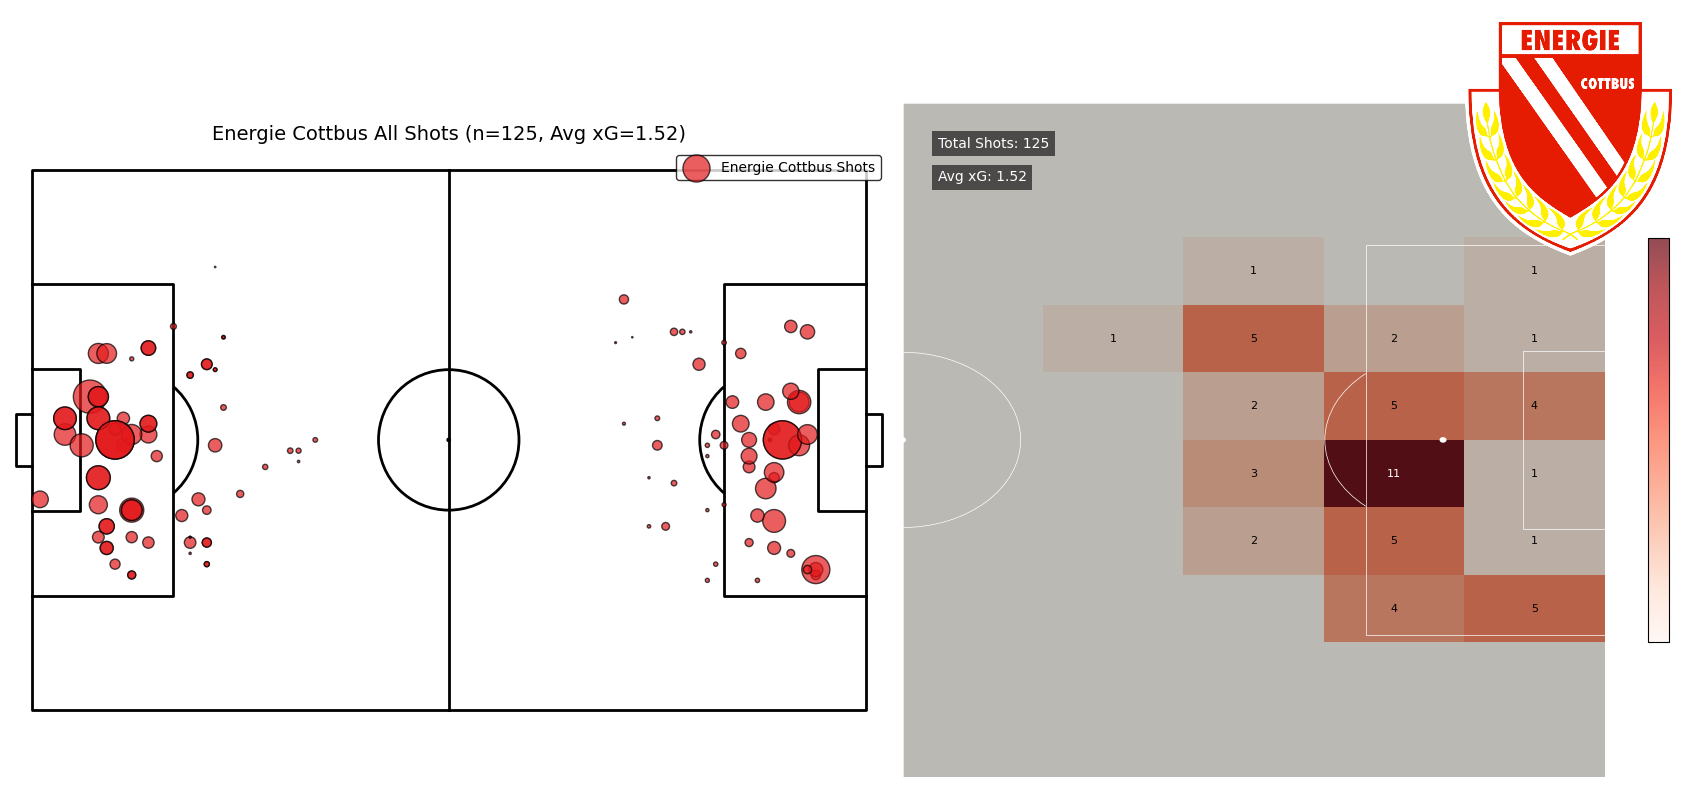

In [21]:
# --- Visualization with Subplots ---
fig, axes = plt.subplots(1, 2, figsize=(18, 8))  # 1 row, 2 columns of subplots
ax_shots = axes[0]
ax_heatmap = axes[1]

# --- Left Subplot: All Energie Cottbus Shots and xG ---
pitch_shots = Pitch(pitch_type='opta', pitch_color='white',
                    line_color='black', goal_type='box')
pitch_shots.draw(ax=ax_shots)

cottbus_shots['plot_x'] = cottbus_shots['start_x']
cottbus_shots['plot_y'] = 100 - cottbus_shots['start_y']  # Invert y-axis for Opta

scatter_cottbus = pitch_shots.scatter(cottbus_shots['plot_x'], cottbus_shots['plot_y'],
                                     ax=ax_shots, color='#e31a1c', edgecolor='black',
                                     s=cottbus_shots['xg'] * 1000, alpha=0.7,
                                     label='Energie Cottbus Shots')

ax_shots.legend(loc='upper right', facecolor='white', edgecolor='black', fontsize=10)
ax_shots.set_title(
    f'Energie Cottbus All Shots (n={len(cottbus_shots)}, Avg xG={cottbus_shots["xg"].sum()/10:.2f})',
    fontsize=14)
ax_shots.invert_yaxis()  # Ensure correct y-axis orientation

# --- Right Subplot: Most Frequent Energie Cottbus Shot Areas Heatmap ---
pitch_heatmap = Pitch(pitch_type='opta', pitch_color='#22312b',
                      line_color='white', goal_type='box', linewidth=0.5)  # Different style
pitch_heatmap.draw(ax=ax_heatmap)
ax_heatmap.set_xlim(50, 100)  # Focus on the attacking half for Energie Cottbus
ax_heatmap.set_ylim(0, 100)

# Define the heatmap grid for Energie Cottbus's attacking half
heatmap_grid_x_bins = np.arange(5, 10)  # x_bins 5 to 9
heatmap_grid_y_bins = np.arange(0, 10)
heatmap_grid_x_coords = heatmap_grid_x_bins * 10 + 5
heatmap_grid_y_coords = heatmap_grid_y_bins * 10 + 5
heatmap_data = np.zeros((len(heatmap_grid_y_bins), len(heatmap_grid_x_bins)))

# Populate the heatmap data
for _, row in frequent_cottbus_areas.iterrows():
    if 5 <= row['x_bin'] <= 9 and 0 <= row['y_bin'] <= 9:
        x_bin_index = int(row['x_bin'] - 5)
        y_bin_index = int(row['y_bin'])
        if 0 <= x_bin_index < len(heatmap_grid_x_bins) and 0 <= y_bin_index < len(heatmap_grid_y_bins):
            heatmap_data[y_bin_index, x_bin_index] = row['shot_count']

# Plot the heatmap
im = ax_heatmap.imshow(heatmap_data, extent=[50, 100, 0, 100],
                      origin='lower', cmap='Reds', aspect='auto', alpha=0.7)  # Using Reds

# Add colorbar for heatmap
cbar = fig.colorbar(im, ax=ax_heatmap, shrink=0.6)
cbar.ax.yaxis.set_tick_params(color='white')
plt.setp(plt.getp(cbar.ax.axes, 'yticklabels'), color='white')

# Add labels to the heatmap cells
for i in range(heatmap_data.shape[0]):
    for j in range(heatmap_data.shape[1]):
        if heatmap_data[i, j] > 0:
            text_color = 'white' if heatmap_data[i, j] > heatmap_data.max() / 2 else 'black'
            ax_heatmap.text(heatmap_grid_x_coords[j], heatmap_grid_y_coords[i], int(heatmap_data[i, j]),
                            ha='center', va='center', color=text_color, fontsize=8)

ax_heatmap.set_title('Energie Cottbus Most Frequent Shot Areas', color='white', fontsize=14)
#ax_heatmap.invert_yaxis()  # Ensure correct y-axis orientation

# Add text annotation for shot count and average xG on the heatmap subplot
total_cottbus_shots_heatmap = frequent_cottbus_areas['shot_count'].sum()
avg_cottbus_xg_heatmap = cottbus_shots['xg'].sum()/10  # Using all Cottbus shots for overall avg xG

ax_heatmap.text(0.05, 0.95, f'Total Shots: {total_cottbus_shots_heatmap}', transform=ax_heatmap.transAxes,
                fontsize=10, color='white', verticalalignment='top',
                bbox=dict(facecolor='black', alpha=0.6, edgecolor='none'))
ax_heatmap.text(0.05, 0.90, f'Avg xG: {avg_cottbus_xg_heatmap:.2f}', transform=ax_heatmap.transAxes,
                fontsize=10, color='white', verticalalignment='top',
                bbox=dict(facecolor='black', alpha=0.6, edgecolor='none'))


# Add the flag
try:
    img = plt.imread(r'C:\Users\backo\Downloads\Logo_Energie_Cottbus.png')  # Replace with your flag image path
    imagebox = OffsetImage(img, zoom=0.3)  # Adjust zoom as needed
    ab = AnnotationBbox(imagebox, (0.95, 0.95), xycoords='axes fraction', frameon=False)
    ax_heatmap.add_artist(ab)
except FileNotFoundError:
    print("Flag image not found. Skipping flag display.")

plt.tight_layout()
plt.show()

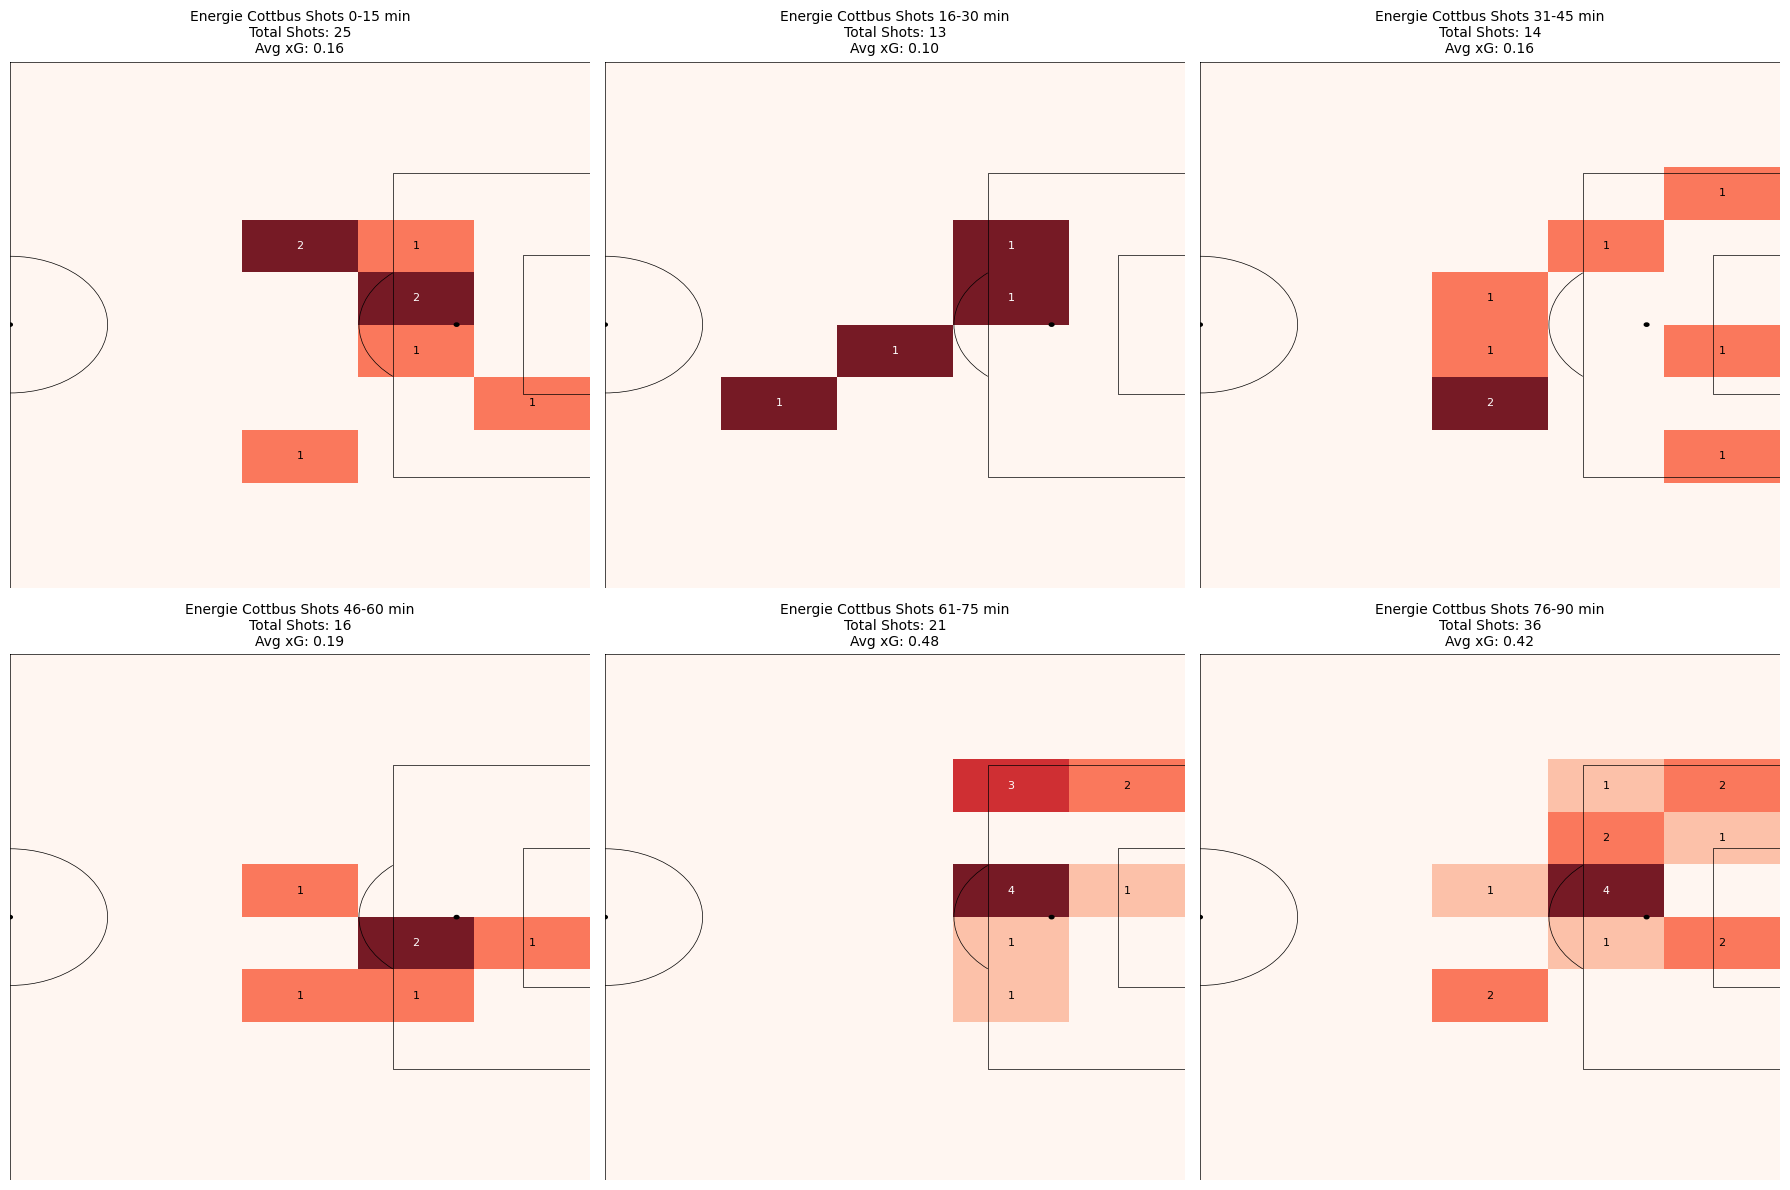

In [23]:
# Define time intervals (in minutes)
time_intervals = [
    (0, 15),
    (16, 30),
    (31, 45),
    (46, 60),
    (61, 75),
    (76, 90),
]

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 12))
axes = axes.flatten()  # Flatten the 2x3 array of axes for easy iteration

for i, (start_time, end_time) in enumerate(time_intervals):
    ax = axes[i]
    pitch = Pitch(pitch_type='opta', pitch_color='white', line_color='black', goal_type='box', linewidth=0.5)
    pitch.draw(ax=ax)
    ax.set_xlim(50, 100)  # Focus on the attacking half for Energie Cottbus
    ax.set_ylim(0, 100)
    ax.invert_yaxis()

    # Filter Energie Cottbus shots for the current time interval
    interval_shots = cottbus_shots[
        (cottbus_shots['minute'] >= start_time) & (cottbus_shots['minute'] <= end_time)
    ].copy()
    total_shots_interval = len(interval_shots)
    avg_xg_interval = interval_shots['xg'].sum()/10 if not interval_shots.empty else 0
    ax.set_title(f'Energie Cottbus Shots {start_time}-{end_time} min\nTotal Shots: {total_shots_interval}\nAvg xG: {avg_xg_interval:.2f}', color='black', fontsize=10)

    # Create heatmap data for the current interval
    heatmap_data = np.zeros((10, 5))  # For the right half (x_bins 5-9)
    for _, shot in interval_shots.iterrows():
        if 'x_bin' in shot and 'y_bin' in shot:  # Ensure x_bin and y_bin exist
            x_bin = int(shot['x_bin'])
            y_bin = int(shot['y_bin'])
            if 5 <= x_bin <= 9 and 0 <= y_bin <= 9:
                x_bin_index = int(x_bin - 5)  # Adjust index for the 5 columns
                y_bin_index = int(y_bin)
                if 0 <= x_bin_index < 5 and 0 <= y_bin_index < 10:
                    heatmap_data[y_bin_index, x_bin_index] += 1  # Count each shot

    # Plot the heatmap for the current interval
    im = ax.imshow(heatmap_data, extent=[50, 100, 0, 100], origin='lower', cmap='Reds', aspect='auto', alpha=0.9)

    # Add labels to the heatmap cells
    heatmap_grid_x_bins = np.arange(5, 10)
    heatmap_grid_y_bins = np.arange(0, 10)
    heatmap_grid_x_coords = heatmap_grid_x_bins * 10 + 5
    heatmap_grid_y_coords = heatmap_grid_y_bins * 10 + 5
    for row in range(heatmap_data.shape[0]):
        for col in range(heatmap_data.shape[1]):
            if heatmap_data[row, col] > 0:
                text_color = 'white' if heatmap_data[row, col] > heatmap_data.max() / 2 else 'black'
                ax.text(heatmap_grid_x_coords[col], heatmap_grid_y_coords[row], int(heatmap_data[row, col]),
                        ha='center', va='center', color=text_color, fontsize=8)

# Add the flag to the last subplot (you can adjust the index if needed)


plt.tight_layout()
plt.show()

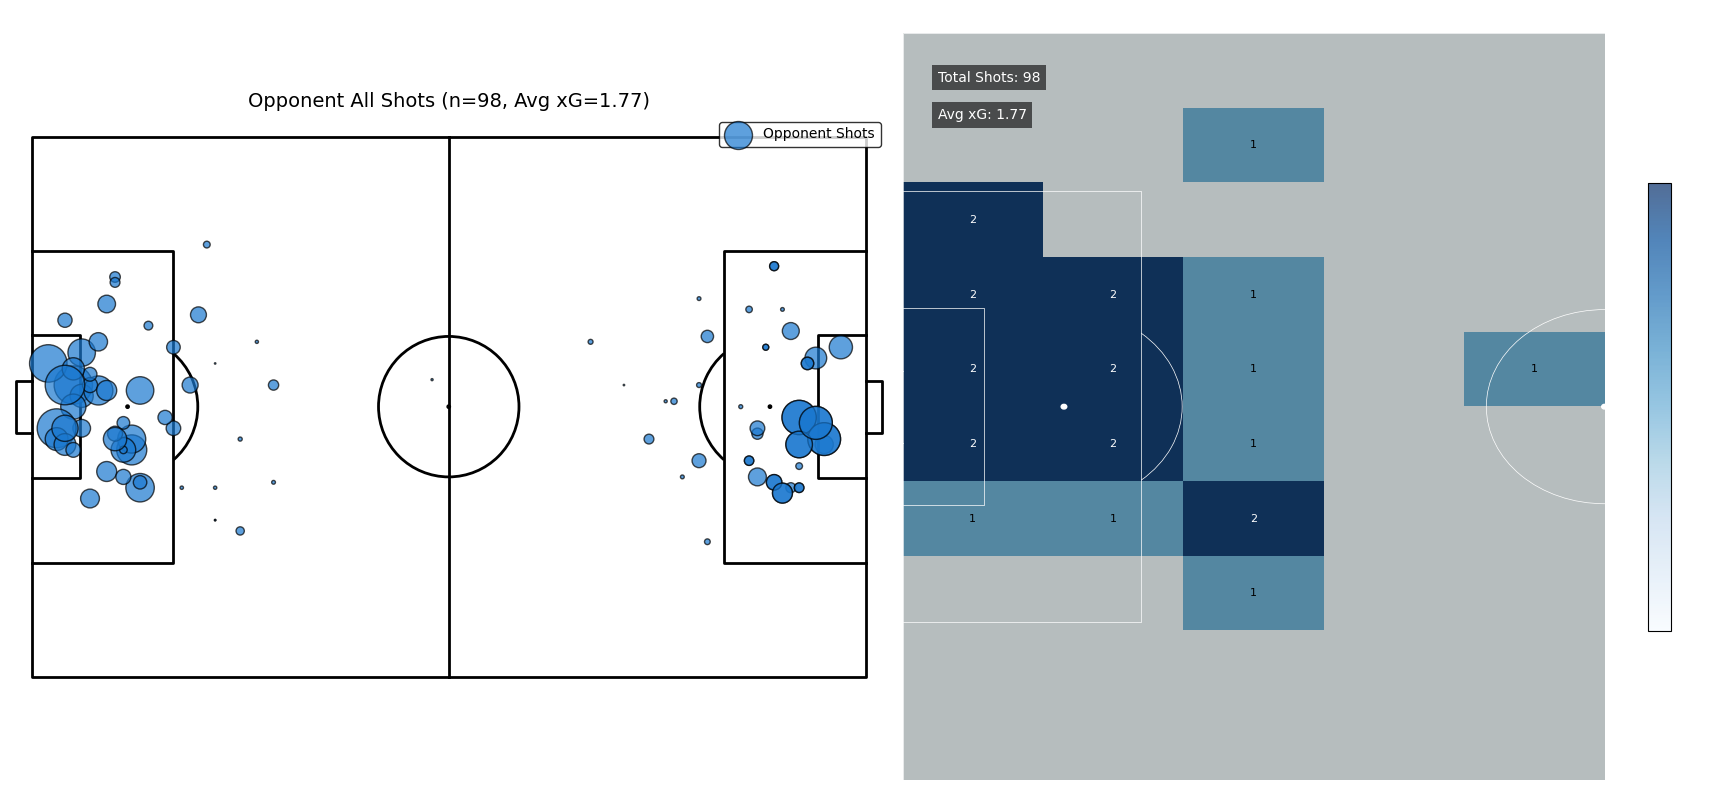

In [25]:
# Filter for opponent data
opponent_shots = all_shots_df[all_shots_df['shooting_team'] != 'Energie Cottbus'].copy()
frequent_opponent_areas = most_frequent_shot_areas[most_frequent_shot_areas['shooting_team'] != 'Energie Cottbus'].copy()

# --- Visualization with Subplots ---
fig, axes = plt.subplots(1, 2, figsize=(18, 8))  # 1 row, 2 columns of subplots
ax_shots = axes[0]
ax_heatmap = axes[1]

# --- Left Subplot: All Opponent Shots and xG ---
pitch_shots = Pitch(pitch_type='opta', pitch_color='white',
                    line_color='black', goal_type='box')
pitch_shots.draw(ax=ax_shots)

opponent_shots['plot_x'] = opponent_shots['start_x']
opponent_shots['plot_y'] = opponent_shots['start_y'] # Assuming opponent y is bottom-up

scatter_opponent = pitch_shots.scatter(opponent_shots['plot_x'], opponent_shots['plot_y'],
                                      ax=ax_shots, color='#1a78cf', edgecolor='black',
                                      s=opponent_shots['xg'] * 1000, alpha=0.7,
                                      label='Opponent Shots')

ax_shots.legend(loc='upper right', facecolor='white', edgecolor='black', fontsize=10)
ax_shots.set_title(f'Opponent All Shots (n={len(opponent_shots)}, Avg xG={opponent_shots["xg"].sum()/10:.2f})', fontsize=14)
ax_shots.invert_yaxis() # Ensure correct y-axis orientation

# --- Right Subplot: Most Frequent Opponent Shot Areas Heatmap (Attacking Half - Left Side for Opponents) ---
pitch_heatmap = Pitch(pitch_type='opta', pitch_color='#22312b',
                      line_color='white', goal_type='box', linewidth=0.5) # Different style for contrast
pitch_heatmap.draw(ax=ax_heatmap)
ax_heatmap.set_xlim(0, 50) # Focus on the left attacking half for opponents
ax_heatmap.set_ylim(0, 100)

# Define the heatmap grid for the left half
heatmap_grid_x_bins = np.arange(0, 5)
heatmap_grid_y_bins = np.arange(0, 10)
heatmap_grid_x_coords = heatmap_grid_x_bins * 10 + 5
heatmap_grid_y_coords = heatmap_grid_y_bins * 10 + 5
heatmap_data = np.zeros((len(heatmap_grid_y_bins), len(heatmap_grid_x_bins)))

# Populate the heatmap data
for _, row in frequent_opponent_areas.iterrows():
    if 0 <= row['x_bin'] <= 4 and 0 <= row['y_bin'] <= 9:
        x_bin_index = int(row['x_bin'])
        y_bin_index = int(row['y_bin'])
        if 0 <= x_bin_index < len(heatmap_grid_x_bins) and 0 <= y_bin_index < len(heatmap_grid_y_bins):
            heatmap_data[y_bin_index, x_bin_index] = row['shot_count']

# Plot the heatmap
im = ax_heatmap.imshow(heatmap_data, extent=[0, 50, 0, 100],
                       origin='lower', cmap='Blues', aspect='auto', alpha=0.7) # Using Blues for opponents

# Add colorbar for heatmap
cbar = fig.colorbar(im, ax=ax_heatmap, shrink=0.6)
cbar.ax.yaxis.set_tick_params(color='white')
plt.setp(plt.getp(cbar.ax.axes, 'yticklabels'), color='white')

# Add labels to the heatmap cells
for i in range(heatmap_data.shape[0]):
    for j in range(heatmap_data.shape[1]):
        if heatmap_data[i, j] > 0:
            text_color = 'white' if heatmap_data[i, j] > heatmap_data.max() / 2 else 'black'
            ax_heatmap.text(heatmap_grid_x_coords[j], heatmap_grid_y_coords[i], int(heatmap_data[i, j]),
                            ha='center', va='center', color=text_color, fontsize=8)

ax_heatmap.set_title('Opponent Most Frequent Shot Areas', color='white', fontsize=14)
ax_heatmap.invert_yaxis() # Ensure correct y-axis orientation

# Add text annotation for shot count and average xG on the heatmap subplot
total_opponent_shots_heatmap = frequent_opponent_areas['shot_count'].sum()
avg_opponent_xg_heatmap = opponent_shots['xg'].sum()/10 # Using all opponent shots for overall avg xG

ax_heatmap.text(0.05, 0.95, f'Total Shots: {total_opponent_shots_heatmap}', transform=ax_heatmap.transAxes,
                fontsize=10, color='white', verticalalignment='top', bbox=dict(facecolor='black', alpha=0.6, edgecolor='none'))
ax_heatmap.text(0.05, 0.90, f'Avg xG: {avg_opponent_xg_heatmap:.2f}', transform=ax_heatmap.transAxes,
                fontsize=10, color='white', verticalalignment='top', bbox=dict(facecolor='black', alpha=0.6, edgecolor='none'))

plt.tight_layout()
plt.show()

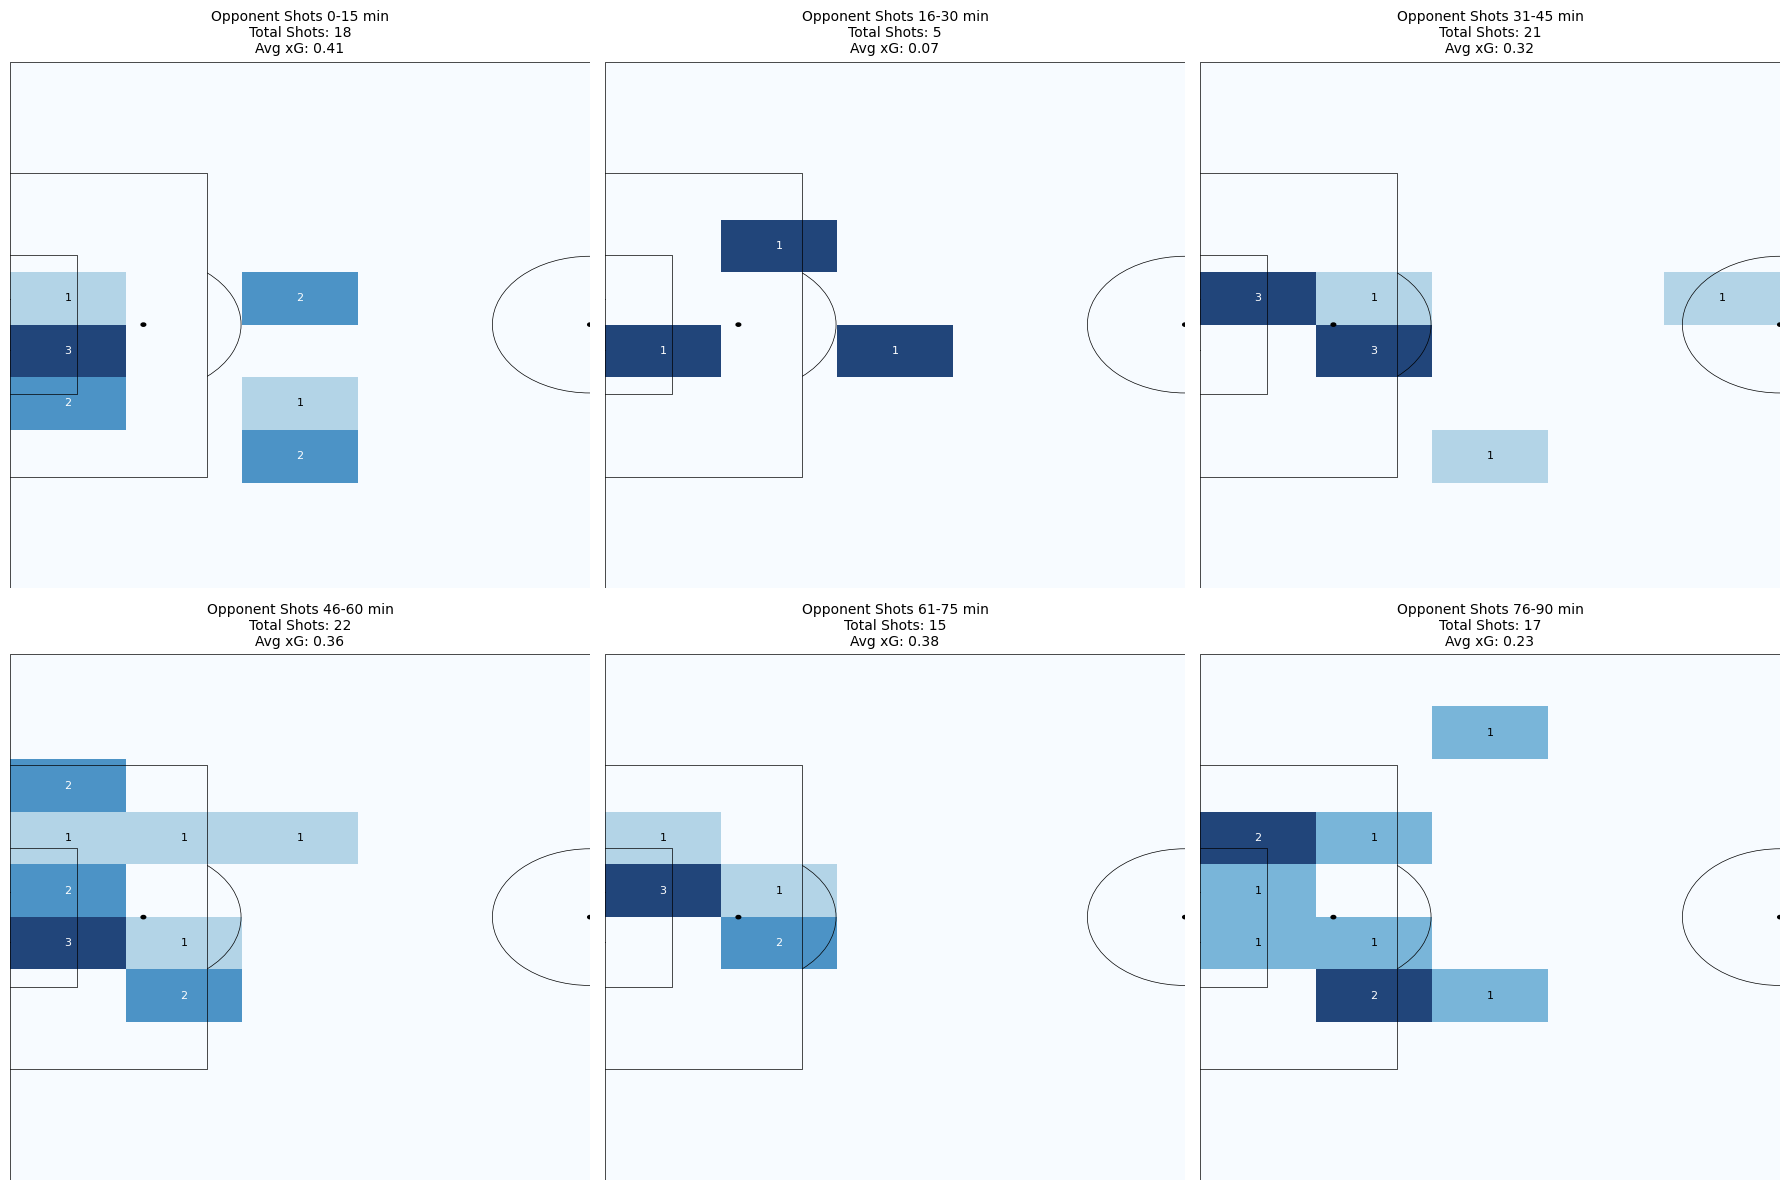

In [28]:
# Define time intervals (in minutes)
time_intervals = [
    (0, 15),
    (16, 30),
    (31, 45),
    (46, 60),
    (61, 75),
    (76, 90),
]

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 12))
axes = axes.flatten()  # Flatten the 2x3 array of axes for easy iteration

for i, (start_time, end_time) in enumerate(time_intervals):
    ax = axes[i]
    pitch = Pitch(pitch_type='opta', pitch_color='white', line_color='black', goal_type='box', linewidth=0.5)
    pitch.draw(ax=ax)
    ax.set_xlim(0, 50)
    ax.set_ylim(0, 100)
    ax.invert_yaxis()

    # Filter opponent shots for the current time interval
    interval_shots = opponent_shots[
        (opponent_shots['minute'] >= start_time) & (opponent_shots['minute'] <= end_time)
    ].copy()
    total_shots_interval = len(interval_shots)
    avg_xg_interval = interval_shots['xg'].sum()/10 if not interval_shots.empty else 0
    ax.set_title(f'Opponent Shots {start_time}-{end_time} min\nTotal Shots: {total_shots_interval}\nAvg xG: {avg_xg_interval:.2f}', color='black', fontsize=10)

    # Create heatmap data for the current interval
    heatmap_data = np.zeros((10, 5))
    for _, shot in interval_shots.iterrows():
        if 'x_bin' in shot and 'y_bin' in shot:  # Ensure x_bin and y_bin exist
            x_bin = int(shot['x_bin'])
            y_bin = int(shot['y_bin'])
            if 0 <= x_bin <= 4 and 0 <= y_bin <= 9:
                x_bin_index = int(x_bin)
                y_bin_index = int(y_bin)
                if 0 <= x_bin_index < 5 and 0 <= y_bin_index < 10:
                    heatmap_data[y_bin_index, x_bin_index] += 1  # Count each shot

    # Plot the heatmap for the current interval
    im = ax.imshow(heatmap_data, extent=[0, 50, 0, 100], origin='lower', cmap='Blues', aspect='auto', alpha=0.9)

    # Add labels to the heatmap cells
    heatmap_grid_x_bins = np.arange(0, 5)
    heatmap_grid_y_bins = np.arange(0, 10)
    heatmap_grid_x_coords = heatmap_grid_x_bins * 10 + 5
    heatmap_grid_y_coords = heatmap_grid_y_bins * 10 + 5
    for row in range(heatmap_data.shape[0]):
        for col in range(heatmap_data.shape[1]):
            if heatmap_data[row, col] > 0:
                text_color = 'white' if heatmap_data[row, col] > heatmap_data.max() / 2 else 'black'
                ax.text(heatmap_grid_x_coords[col], heatmap_grid_y_coords[row], int(heatmap_data[row, col]),
                        ha='center', va='center', color=text_color, fontsize=8)

plt.tight_layout()
plt.show()

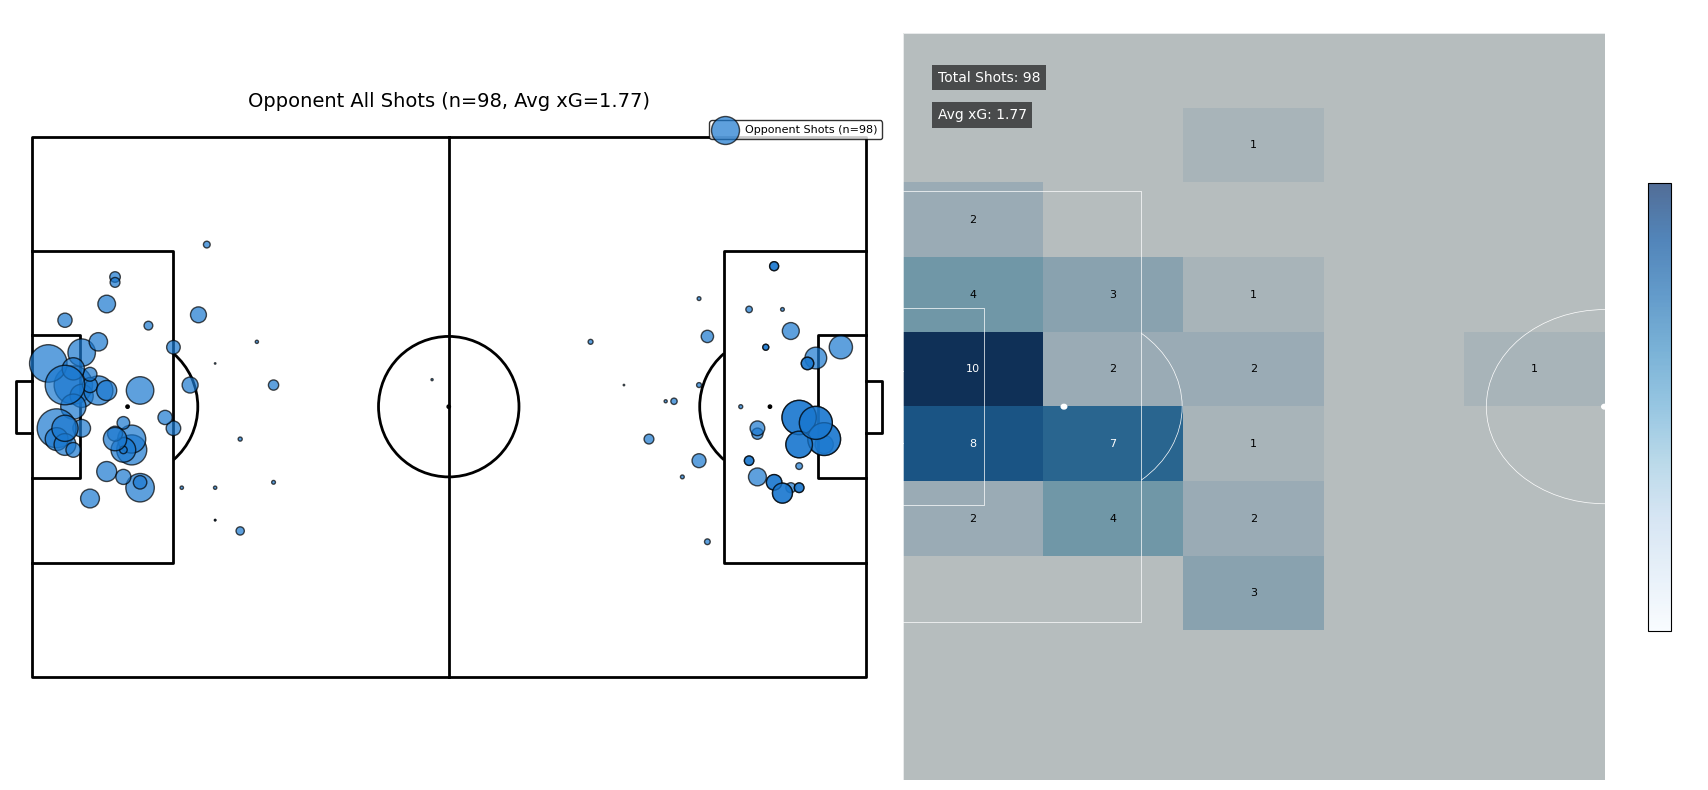

In [31]:
# --- Visualization with Subplots ---
fig, axes = plt.subplots(1, 2, figsize=(18, 8))  # 1 row, 2 columns of subplots
ax_shots = axes[0]
ax_heatmap = axes[1]

# --- Left Subplot: All Opponent Shots and xG ---
pitch_shots = Pitch(pitch_type='opta', pitch_color='white', line_color='black', goal_type='box')
pitch_shots.draw(ax=ax_shots)
ax_shots.invert_yaxis()

# Scatter plot of all opponent shots
opponent_shots['plot_x'] = opponent_shots['start_x']
opponent_shots['plot_y'] = opponent_shots['start_y']
pitch_shots.scatter(
    opponent_shots['plot_x'],
    opponent_shots['plot_y'],
    ax=ax_shots,
    color='#1a78cf',
    edgecolor='black',
    s=opponent_shots['xg'] * 1000,
    alpha=0.7,
    label=f'Opponent Shots (n={len(opponent_shots)})',
)

ax_shots.set_title(f'Opponent All Shots (n={len(opponent_shots)}, Avg xG={opponent_shots["xg"].sum()/10:.2f})', fontsize=14)
ax_shots.legend(loc='upper right', facecolor='white', edgecolor='black', fontsize=8)

# --- Right Subplot: Opponent Shot Frequency (Left Side of Goal) ---
pitch_heatmap = Pitch(pitch_type='opta', pitch_color='#22312b', line_color='white', goal_type='box', linewidth=0.5)
pitch_heatmap.draw(ax=ax_heatmap)
ax_heatmap.set_xlim(0, 50)  # Focus on the left side
ax_heatmap.set_ylim(0, 100)
ax_heatmap.invert_yaxis()

# Populate the heatmap using start_x and start_y bins
heatmap_data = np.zeros((10, 5))  # 10 y-bins, 5 x-bins (left side)
for _, row in frequent_opponent_areas.iterrows():
    x_bin = int(row['x_bin'])
    y_bin = int(row['y_bin'])
    # Filter for x_bin on the left side (0-4)
    if 0 <= x_bin <= 4 and 0 <= y_bin <= 9:
        x_bin_index = int(x_bin)  # x_bin directly corresponds to the column index
        y_bin_index = int(y_bin)  # y_bin corresponds to the row index
        heatmap_data[y_bin_index, x_bin_index] = (
            heatmap_data[y_bin_index, x_bin_index] + row['shot_count']
        )  # Accumulate counts

# Plot the heatmap
im = ax_heatmap.imshow(heatmap_data, extent=[0, 50, 0, 100], origin='lower', cmap='Blues', aspect='auto', alpha=0.7)

# Add colorbar for heatmap
cbar = fig.colorbar(im, ax=ax_heatmap, shrink=0.6)
cbar.ax.yaxis.set_tick_params(color='white')
plt.setp(plt.getp(cbar.ax.axes, 'yticklabels'), color='white')

# Add labels to the heatmap cells
for i in range(heatmap_data.shape[0]):
    for j in range(heatmap_data.shape[1]):
        if heatmap_data[i, j] > 0:
            text_color = 'white' if heatmap_data[i, j] > heatmap_data.max() / 2 else 'black'
            ax_heatmap.text(j * 10 + 5, i * 10 + 5, int(heatmap_data[i, j]), ha='center', va='center', color=text_color, fontsize=8)

ax_heatmap.set_title('Opponent Shot Frequency (Left Side)', color='white', fontsize=14)

# --- Add total shots on the heatmap subplot ---
total_opponent_shots_heatmap = frequent_opponent_areas['shot_count'].sum()
avg_opponent_xg_heatmap = opponent_shots['xg'].sum()/10

ax_heatmap.text(
    0.05,
    0.95,
    f'Total Shots: {total_opponent_shots_heatmap}',
    transform=ax_heatmap.transAxes,
    fontsize=10,
    color='white',
    verticalalignment='top',
    bbox=dict(facecolor='black', alpha=0.6, edgecolor='none'),
)
ax_heatmap.text(
    0.05,
    0.90,
    f'Avg xG: {avg_opponent_xg_heatmap:.2f}',
    transform=ax_heatmap.transAxes,
    fontsize=10,
    color='white',
    verticalalignment='top',
    bbox=dict(facecolor='black', alpha=0.6, edgecolor='none'),
)

plt.tight_layout()
plt.show()